In [2]:
import psycopg2 as pg
from configparser import ConfigParser
import time
import datetime as dt
import csv # in case we want to export some of the data
import sys,os
import numpy as np
import matplotlib.pyplot as plt

# for using datetime on x axis
import matplotlib.dates as mdates
import matplotlib.units as munits
munits.registry[dt.datetime] = mdates.ConciseDateConverter()

# for reading the database parameters from goodlogger's my_config.cfg
goodlogger_dir = "C:\\Users\\QC\OneDrive - UW-Madison\\Documents\\LabSoftware\\GOOD_logger"

cp = ConfigParser()
cp.read(os.path.join(goodlogger_dir,"my_config.cfg"))
conn_params = {'database':cp['DATABASE_SETUP']['Database'],
                'host':cp['DATABASE_SETUP']['Host'],
                'user':cp['DATABASE_SETUP']['User'],
                'password':cp['DATABASE_SETUP']['Password'],
                'port':cp['DATABASE_SETUP']['Port']}

def get_data_in_time_interval(table, column_names, t_start, t_end):
    database = pg.connect(**conn_params)
    cur = database.cursor()

    t1 = t_start.timestamp()
    t2 = t_end.timestamp() twik

    column_names = ['time'] + column_names

    cur.execute(f"SELECT {', '.join(column_names)} FROM {table} where time between {t1} and {t2}")
    row = cur.fetchone()
    rows = []
    while row is not None:
        rows.append([float(x) for x in row])
        row = cur.fetchone()
    return np.array(rows)

def get_data_most_recent(table, column_names, nrows):
    database = pg.connect(**conn_params)
    cur = database.cursor()

    column_names = ['time'] + column_names

    cur.execute(f"SELECT {', '.join(column_names)} FROM {table} ORDER BY time DESC LIMIT {nrows}")
    row = cur.fetchone()
    rows = []
    while row is not None:
        rows.append([float(x) for x in row])
        row = cur.fetchone()
    return np.array(rows)

## 2024.01.22

In [7]:
data =  get_data_in_time_interval(table='qn_labjack_channels',
                                column_names=[f'ch{i}' for i in range(1,11)],
                                t_start=dt.datetime(2024, 1, 22, 14, 0),
                                t_end=dt.datetime(2024, 1, 22, 15, 40))

time, magX, magY, magZ, zotAZtop, zotAX, zotAY, monitorAZbottom, monitorAZtop, monitorAX, monitorAY = data.transpose() # time is unix time in seconds
datetimes = [dt.datetime.fromtimestamp(t) for t in time] # time to datetime

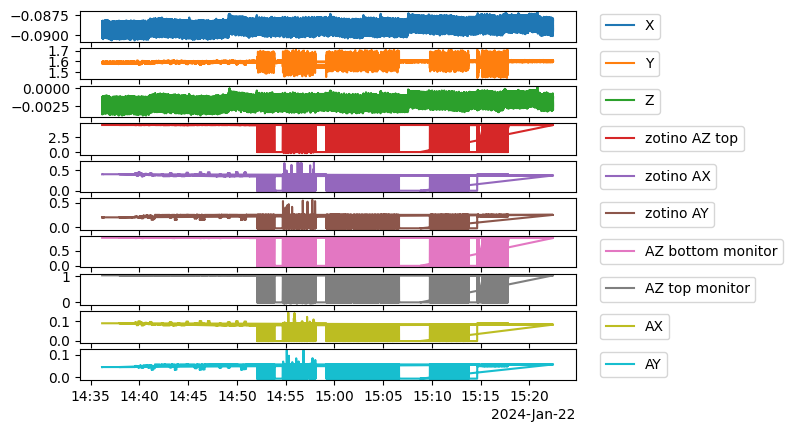

In [8]:
# no scaling of channels, just get a sense of whether there are clear correlations or large drifts

labels = ['X','Y','Z','zotino AZ top','zotino AX','zotino AY','AZ bottom monitor','AZ top monitor','AX','AY']
channels = [magX, magY, magZ, zotAZtop, zotAX, zotAY, monitorAZbottom, monitorAZtop, monitorAX, monitorAY]

colors = plt.rcParams["axes.prop_cycle"]()
fig,axes = plt.subplots(nrows=len(channels),sharex=True)
for ax,ch,lbl in zip(axes,channels,labels):
    c = next(colors)["color"]
    ax.plot(datetimes,ch,label=lbl,color=c)
    ax.legend(loc=(1.05,0.1))

In [1]:
1e4*35e-6

0.35

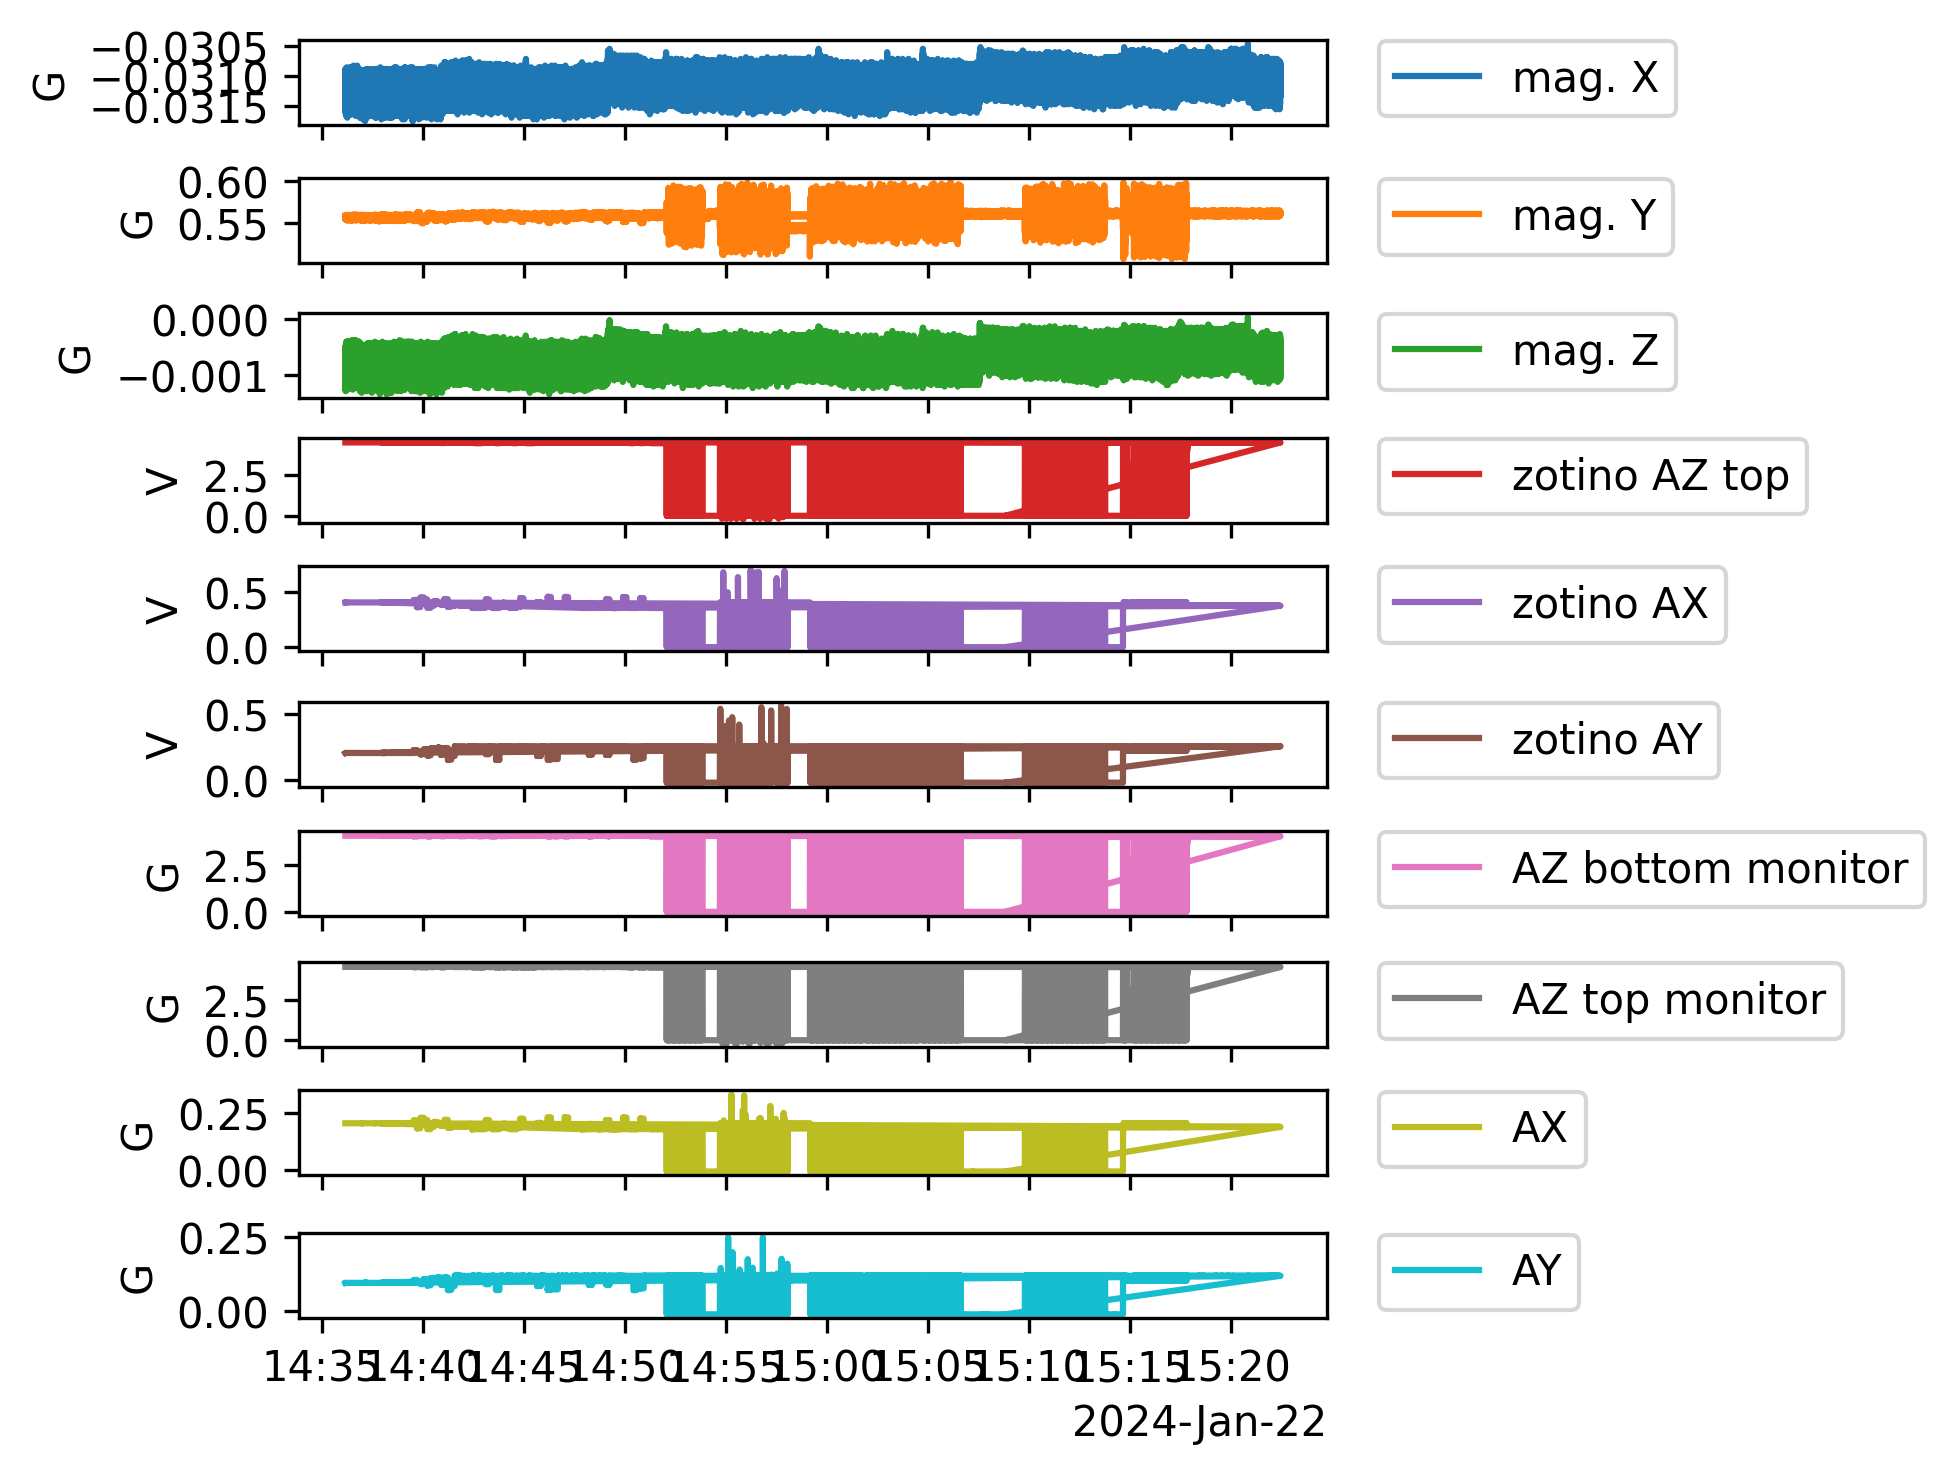

In [9]:
# plot with units G for magnetometer and coil monitor 

labels = ['mag. X','mag. Y','mag. Z','zotino AZ top','zotino AX','zotino AY','AZ bottom monitor','AZ top monitor','AX','AY']
ylabels = ['G','G','G','V','V','V','G','G','G','G']

G_per_V_SM = 1e4*35e-6 # G per T * T per V for Stefan-Mayer FLC3-70
G_per_V_AZ_bottom = 8.75/2 # G per A * A per monitor = V for the AZ top shim coil
G_per_V_AZ_top = 8.75/2 # G per A * A per monitor = V for the AZ top shim coil
G_per_V_AX = 2.27 # G per A * A per monitor = V for the AX shim coil
G_per_V_AY = 2.10 # G per A * A per monitor = V for the AY shim coil

channels = [magX*G_per_V_SM, magY*G_per_V_SM, magZ*G_per_V_SM,
            zotAZtop, zotAX, zotAY, 
            monitorAZbottom*G_per_V_AZ_bottom, monitorAZtop*G_per_V_AZ_top, monitorAX*G_per_V_AX, monitorAY*G_per_V_AY]

colors = plt.rcParams["axes.prop_cycle"]()
fig,axes = plt.subplots(nrows=len(channels),sharex=True, constrained_layout=True,dpi=300)
for ax,ch,lbl,ylbl in zip(axes,channels,labels,ylabels):
    c = next(colors)["color"]
    ax.plot(datetimes,ch,label=lbl,color=c)
    ax.set_ylabel(ylbl)
    ax.legend(loc=(1.05,0.1))
# plt.savefig('magnetometer_zotino_coilmonitor_data_20231012.png',bbox_inches='tight')
# fig.tight_layout()

### 2023.10.12

getting data from the Stefan-Mayer 3-axis magnetometer

In [4]:
data =  get_data_in_time_interval(table='qn_labjack_channels',
                                column_names=[f'ch{i}' for i in range(1,11)],
                                t_start=dt.datetime(2023, 10, 11, 17, 30),
                                t_end=dt.datetime(2023, 10, 12, 8, 52))

time, magX, magY, magZ, zotAZtop, zotAX, zotAY, monitorAZbottom, monitorAZtop, monitorAX, monitorAY = data.transpose() # time is unix time in seconds
datetimes = [dt.datetime.fromtimestamp(t) for t in time] # time to datetime

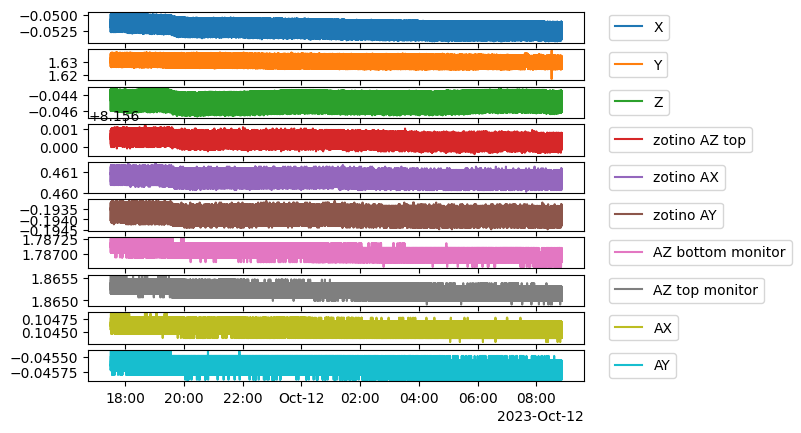

In [71]:
# no scaling of channels, just get a sense of whether there are clear correlations or large drifts

labels = ['X','Y','Z','zotino AZ top','zotino AX','zotino AY','AZ bottom monitor','AZ top monitor','AX','AY']
channels = [magX, magY, magZ, zotAZtop, zotAX, zotAY, monitorAZbottom, monitorAZtop, monitorAX, monitorAY]

colors = plt.rcParams["axes.prop_cycle"]()
fig,axes = plt.subplots(nrows=len(channels),sharex=True)
for ax,ch,lbl in zip(axes,channels,labels):
    c = next(colors)["color"]
    ax.plot(datetimes,ch,label=lbl,color=c)
    ax.legend(loc=(1.05,0.1))

In [8]:
os.getcwd()

'D:\\Networking Exp Data\\PostgreSQL data'

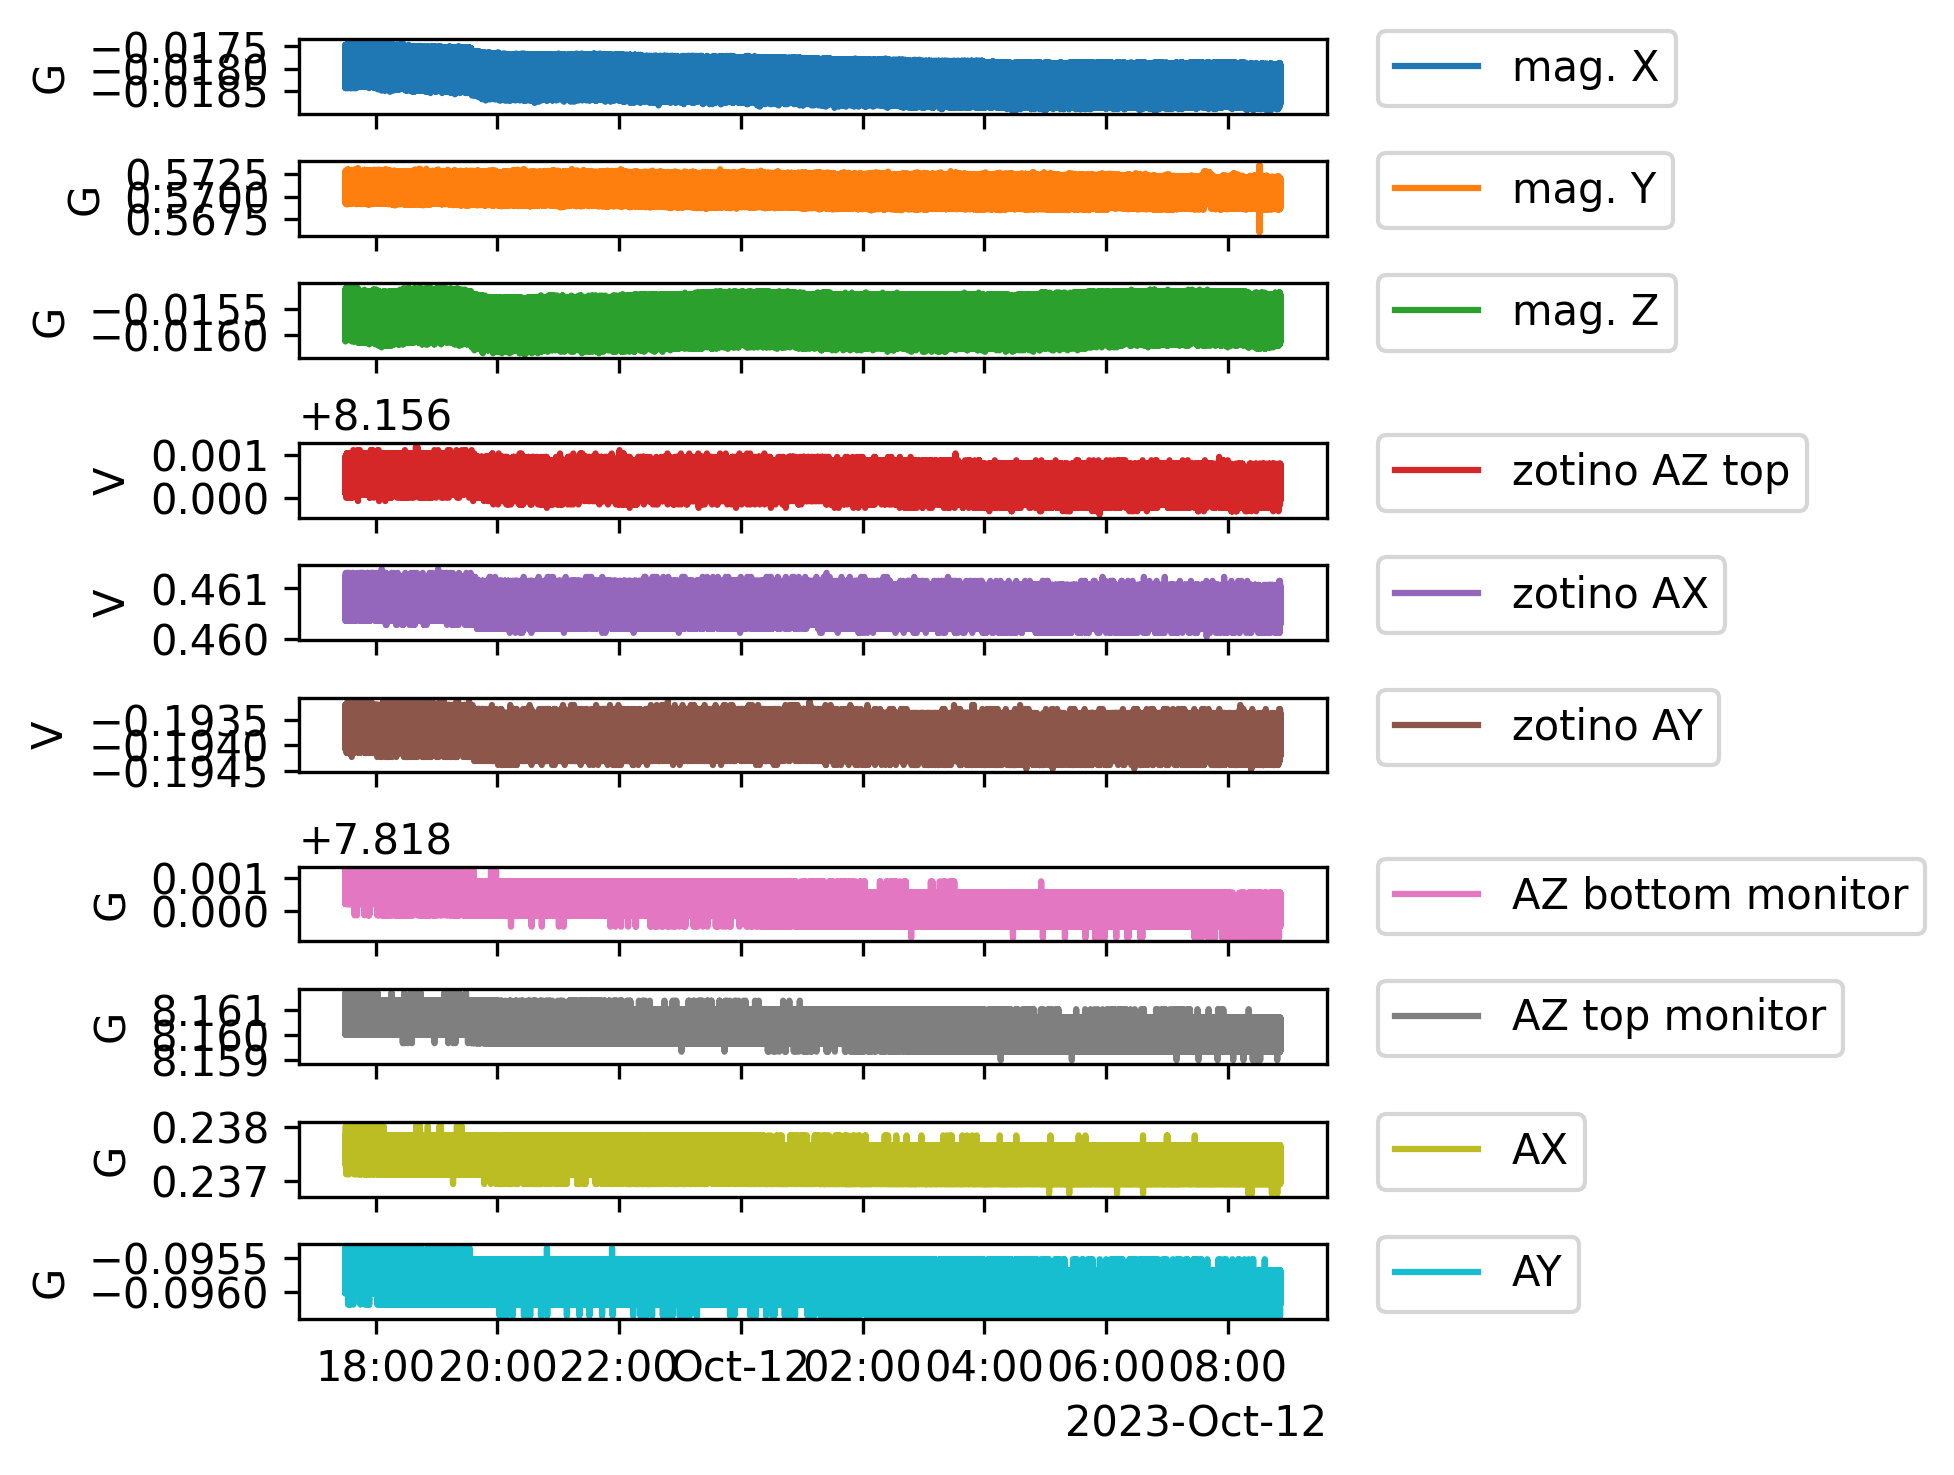

In [7]:
# plot with units G for magnetometer and coil monitor 

labels = ['mag. X','mag. Y','mag. Z','zotino AZ top','zotino AX','zotino AY','AZ bottom monitor','AZ top monitor','AX','AY']
ylabels = ['G','G','G','V','V','V','G','G','G','G']

G_per_V_SM = 1e4*35e-6 # G per T * T per V for Stefan-Mayer FLC3-70
G_per_V_AZ_bottom = 8.75/2 # G per A * A per monitor = V for the AZ top shim coil
G_per_V_AZ_top = 8.75/2 # G per A * A per monitor = V for the AZ top shim coil
G_per_V_AX = 2.27 # G per A * A per monitor = V for the AX shim coil
G_per_V_AY = 2.10 # G per A * A per monitor = V for the AY shim coil

channels = [magX*G_per_V_SM, magY*G_per_V_SM, magZ*G_per_V_SM, 
            zotAZtop, zotAX, zotAY, 
            monitorAZbottom*G_per_V_AZ_bottom, monitorAZtop*G_per_V_AZ_top, monitorAX*G_per_V_AX, monitorAY*G_per_V_AY]

colors = plt.rcParams["axes.prop_cycle"]()
fig,axes = plt.subplots(nrows=len(channels),sharex=True, constrained_layout=True,dpi=300)
for ax,ch,lbl,ylbl in zip(axes,channels,labels,ylabels):
    c = next(colors)["color"]
    ax.plot(datetimes,ch,label=lbl,color=c)
    ax.set_ylabel(ylbl)
    ax.legend(loc=(1.05,0.1))
# plt.savefig('magnetometer_zotino_coilmonitor_data_20231012.png',bbox_inches='tight')
# fig.tight_layout()

In [72]:
1e4*35e-6

0.35

### 2023.10.11

getting data from the Stefan-Mayer 3-axis magnetometer

In [66]:
data =  get_data_in_time_interval(table='qn_labjack_channels',
                                column_names=['ch1','ch2','ch3'],
                                t_start=dt.datetime(2023, 10, 11, 15, 30),
                                t_end=dt.datetime(2023, 10, 11, 17, 25))

labels = ['X','Y','Z']
time, Xpts, Ypts, Zpts = data.transpose() # time is unix time in seconds
datetimes = [dt.datetime.fromtimestamp(t) for t in time] # time to datetime

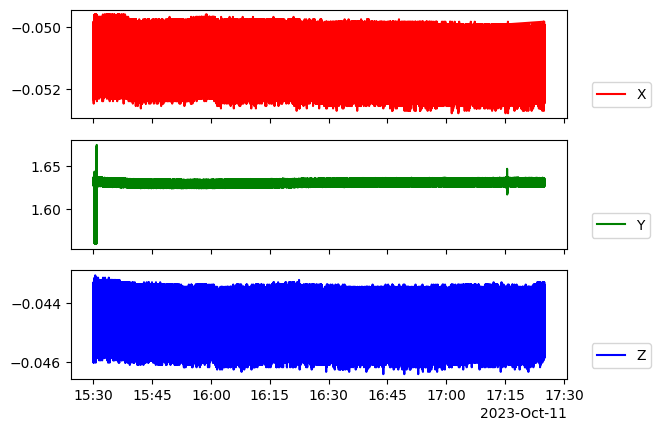

In [67]:
fig,axes = plt.subplots(nrows=3,sharex=True)
colors = ['r','g','b']
for ax,ch,lbl,color in zip(axes,[Xpts, Ypts, Zpts],labels,colors):
    ax.plot(datetimes,ch,label=lbl,c=color)
    ax.legend(loc=(1.05,0.1))

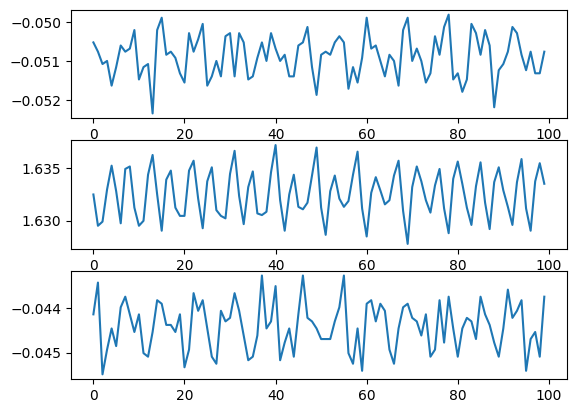

In [60]:
data =  get_data_most_recent(table='qn_labjack_channels',
                             column_names=['ch1','ch2','ch3'],
                             nrows=100)

time, ch1, ch2, ch3 = data.transpose() # time is unix time in seconds
fig,axes = plt.subplots(nrows=3)
axes[0].plot(ch1)
axes[1].plot(ch2)
axes[2].plot(ch3)

### 2023.10.10

In [33]:
"""analyzing Zotino drift during the last 24 hours"""

# get rows of data between specified times
data =  get_data_in_time_interval(table='qn_labjack_channels',
                                column_names=['ch3','ch4','ch5','ch6',],
                                t_start=dt.datetime(2023, 10, 9, 17, 14),
                                t_end=dt.datetime(2023, 10, 10, 17, 14))
time, ch1, ch2, ch3, ch4 = data.transpose() # time is unix time in seconds
datetimes = [dt.datetime.fromtimestamp(t) for t in time] # time to datetime

Text(0.5, 0, 'time')

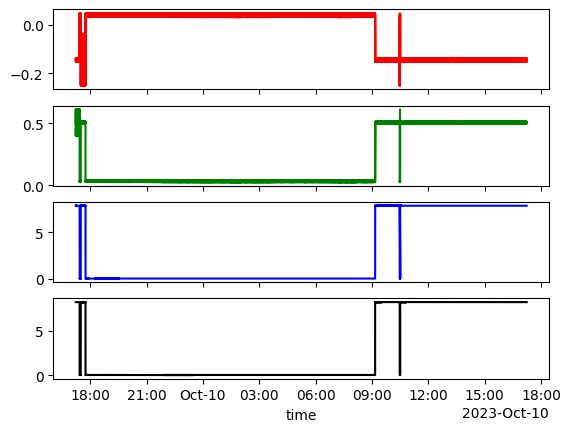

In [34]:
channels = [ch1, ch2, ch3, ch4]
fig,axes = plt.subplots(nrows=len(channels),sharex=True)
colors = ['r','g','b','k']
labels=''
for ax,ch,color in zip(axes,channels,colors):
    ax.plot(datetimes,ch,c=color)
axes[-1].set_xlabel("time")

Text(0.5, 0, 'time')

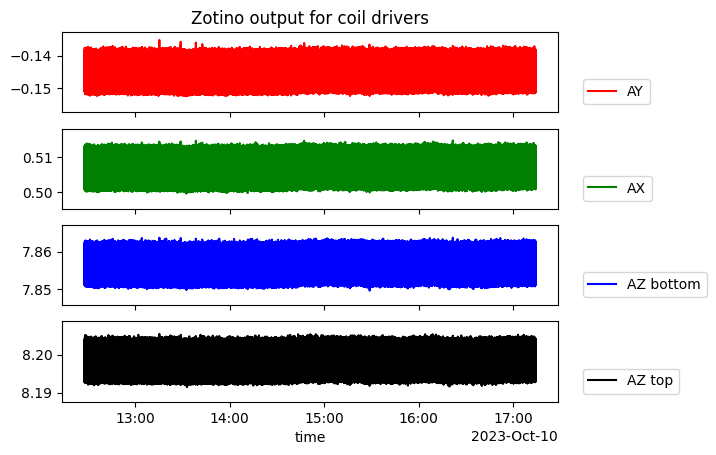

In [55]:
fig,axes = plt.subplots(nrows=len(channels),sharex=True)
colors = ['r','g','b','k']
labels=['AY','AX','AZ bottom','AZ top']
axes[0].set_title("Zotino output for coil drivers")
i_start = int(0.8*len(time))
i_end = len(time)
for ax,ch,color,lbl in zip(axes,channels,colors,labels):
    ypts = ch[i_start:i_end]
    ch_std = np.std(ypts)
    ch_mean = np.mean(ypts)
    ax.plot(datetimes[i_start:i_end],ypts,c=color,label=lbl)
    ax.set_ylim((ch_mean-3*ch_std,ch_mean+3*ch_std))
    # ax.set_xlim(np.datetime64('2023-10-10 11:00'), np.datetime64('2023-10-10 17:00'))
    ax.legend(loc=(1.05,0.1))
# axes[2].set_ylim((7.5,8))
# axes[3].set_ylim((8,8.5))
axes[-1].set_xlabel("time")

In [56]:
for ch in channels:
    ypts = ch[i_start:i_end]
    ch_std = np.std(ypts)
    ch_mean = np.mean(ypts)
    print(ch_mean, ch_std)

-0.14507702297058403 0.00410274688520625
0.5067356192151307 0.003811875443374133
7.856390933190202 0.003549523494512047
8.198172229683367 0.003529805890308582


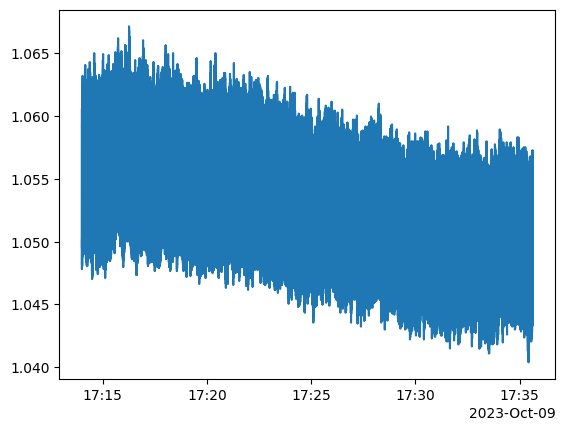

In [30]:
# testing use of datetime for x axis
pts = 100000
dates = [dt.datetime.fromtimestamp(time[i]) for i in range(pts)]
ypts = ch1[:pts]

fig,ax = plt.subplots()
ax.plot(dates,ypts)

In [27]:
dt.datetime.fromtimestamp(time[i])

[datetime.datetime(2023, 10, 9, 17, 14, 0, 7713),
 datetime.datetime(2023, 10, 9, 17, 14, 0, 21676),
 datetime.datetime(2023, 10, 9, 17, 14, 0, 34641),
 datetime.datetime(2023, 10, 9, 17, 14, 0, 47606),
 datetime.datetime(2023, 10, 9, 17, 14, 0, 60572),
 datetime.datetime(2023, 10, 9, 17, 14, 0, 73537),
 datetime.datetime(2023, 10, 9, 17, 14, 0, 86502),
 datetime.datetime(2023, 10, 9, 17, 14, 0, 99468),
 datetime.datetime(2023, 10, 9, 17, 14, 0, 112433),
 datetime.datetime(2023, 10, 9, 17, 14, 0, 125398)]

In [10]:
"""analyzing Zotino drift during a 1D coil scan"""

# get rows of data between specified times
data =  get_data_in_time_interval(table='qn_labjack_channels',
                                column_names=['ch1','ch2','ch3','ch4'],
                                t_start=dt.datetime(2023, 10, 9, 17, 29),
                                t_end=dt.datetime(2023, 10, 9, 17, 40))

Text(0.5, 0, 'time')

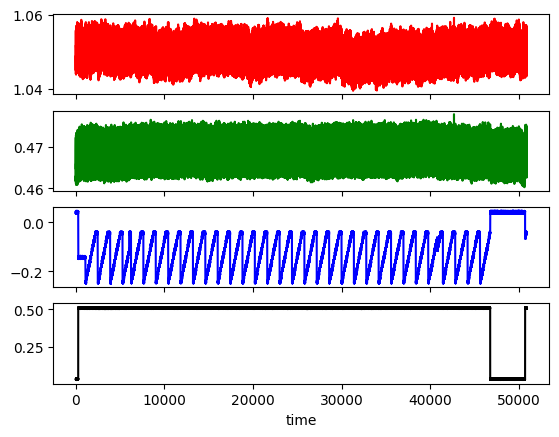

In [14]:
time, ch1, ch2, ch3, ch4 = data.transpose() # time is unix time in seconds
channels = [ch1, ch2, ch3, ch4]
fig,axes = plt.subplots(nrows=len(channels),sharex=True)
colors = ['r','g','b','k']
for ax,ch,color in zip(axes,channels,colors):
    ax.plot(ch,c=color)
axes[-1].set_xlabel("time")

In [ ]:
# there is a problem with the time stamp, and this may come from the goodlogger... not sure how yet.

In [19]:
(time[-1] - time[0])/60, (max(time) - min(time))/60

(3.456091256936391, 10.999690802892049)

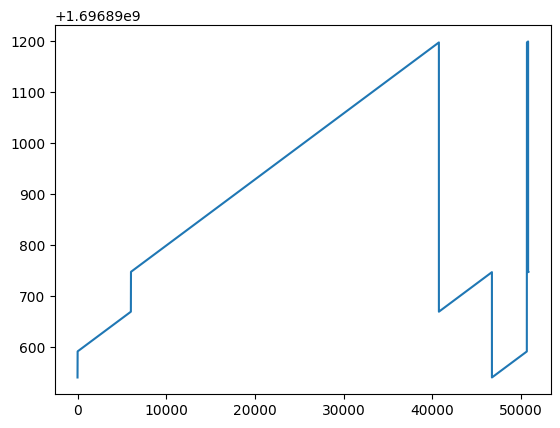

In [15]:
plt.plot(time)

## examples of getting data

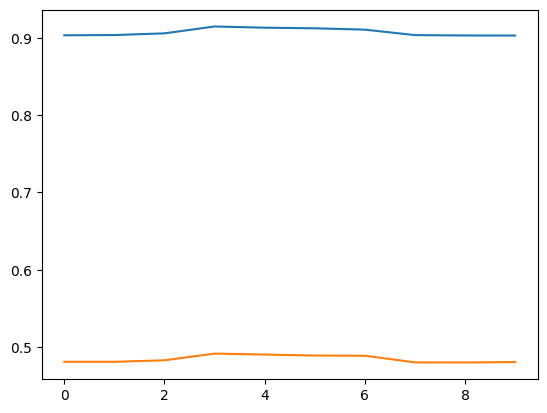

In [81]:
# get 10 most recent rows of data
data =  get_data_most_recent(table='qn_labjack_channels',
                             column_names=['ch1','ch2'],
                             nrows=10)

time, ch1, ch2 = data.transpose() # time is unix time in seconds
plt.plot(ch1)
plt.plot(ch2)

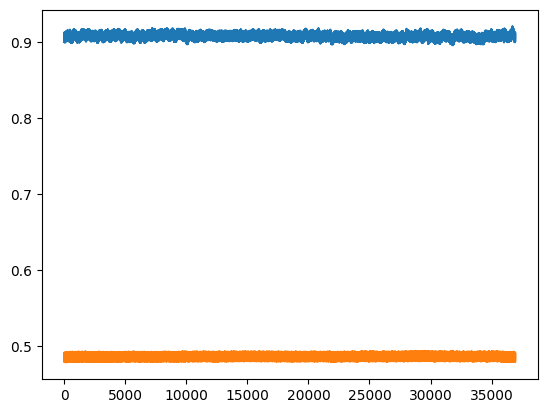

In [82]:
# get rows of data between specified times
data =  get_data_in_time_interval(table='qn_labjack_channels',
                                column_names=['ch1','ch2'],
                                t_start=dt.datetime(2023, 10, 10, 16, 48),
                                t_end=dt.datetime.now())

time, ch1, ch2 = data.transpose() # time is unix time in seconds
plt.plot(ch1)
plt.plot(ch2)

## tests - getting data with SQL queries

In [53]:
database = pg.connect(**conn_params)
cur = database.cursor()
cur.execute("SELECT ch1, ch2 FROM qn_labjack_channels ORDER BY time DESC LIMIT 10")
row = cur.fetchone()
rows = [row]
while row is not None:
    print(row)
    row = cur.fetchone()
    rows.append(row)

(Decimal('0.9147892594337463'), Decimal('0.4896602928638458'))
(Decimal('0.914316713809967'), Decimal('0.48816388845443726'))
(Decimal('0.9130566120147705'), Decimal('0.48682504892349243'))
(Decimal('0.9047083854675293'), Decimal('0.4795006513595581'))
(Decimal('0.9043145775794983'), Decimal('0.4790281057357788'))
(Decimal('0.9060472249984741'), Decimal('0.4813120663166046'))
(Decimal('0.9104576110839844'), Decimal('0.4845410883426666'))
(Decimal('0.9147892594337463'), Decimal('0.4893452525138855'))
(Decimal('0.9149467349052429'), Decimal('0.48903021216392517'))
(Decimal('0.9154192805290222'), Decimal('0.4898965358734131'))


In [57]:
database = pg.connect(**conn_params)
cur = database.cursor()

table = 'qn_labjack_channels'
column_names = ['ch1','ch2']
nrows = 10
cur.execute(f"SELECT {', '.join(column_names)} FROM {table} ORDER BY time DESC LIMIT {nrows}")
row = cur.fetchone()
rows = []
while row is not None:
    rows.append([float(x) for x in row])
    row = cur.fetchone()